In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

folder_type = '1-SG-max'

GA_dir = os.path.join('../1-GA/', folder_type)
PSO_dir = os.path.join('../2-PSO/', folder_type)
SA_dir = os.path.join('../3-SA/', folder_type)
BO_dir = os.path.join('../4-BO/', folder_type)
MDTS_dir = os.path.join('../5-MCTS/', folder_type)
RO_dir = os.path.join('../6-RO/', folder_type)

P_list = [
    '0.01.log',
    '0.03.log',
    '0.05.log',
    '0.1.log',
]

title_list = [
    'Top 1% structures',
    'Top 3% structures',
    'Top 5% structures',
    'Top 10% structures',    
]

custom_palette = ["blue", "green", "red", "lightgray", "gray", "pink"]

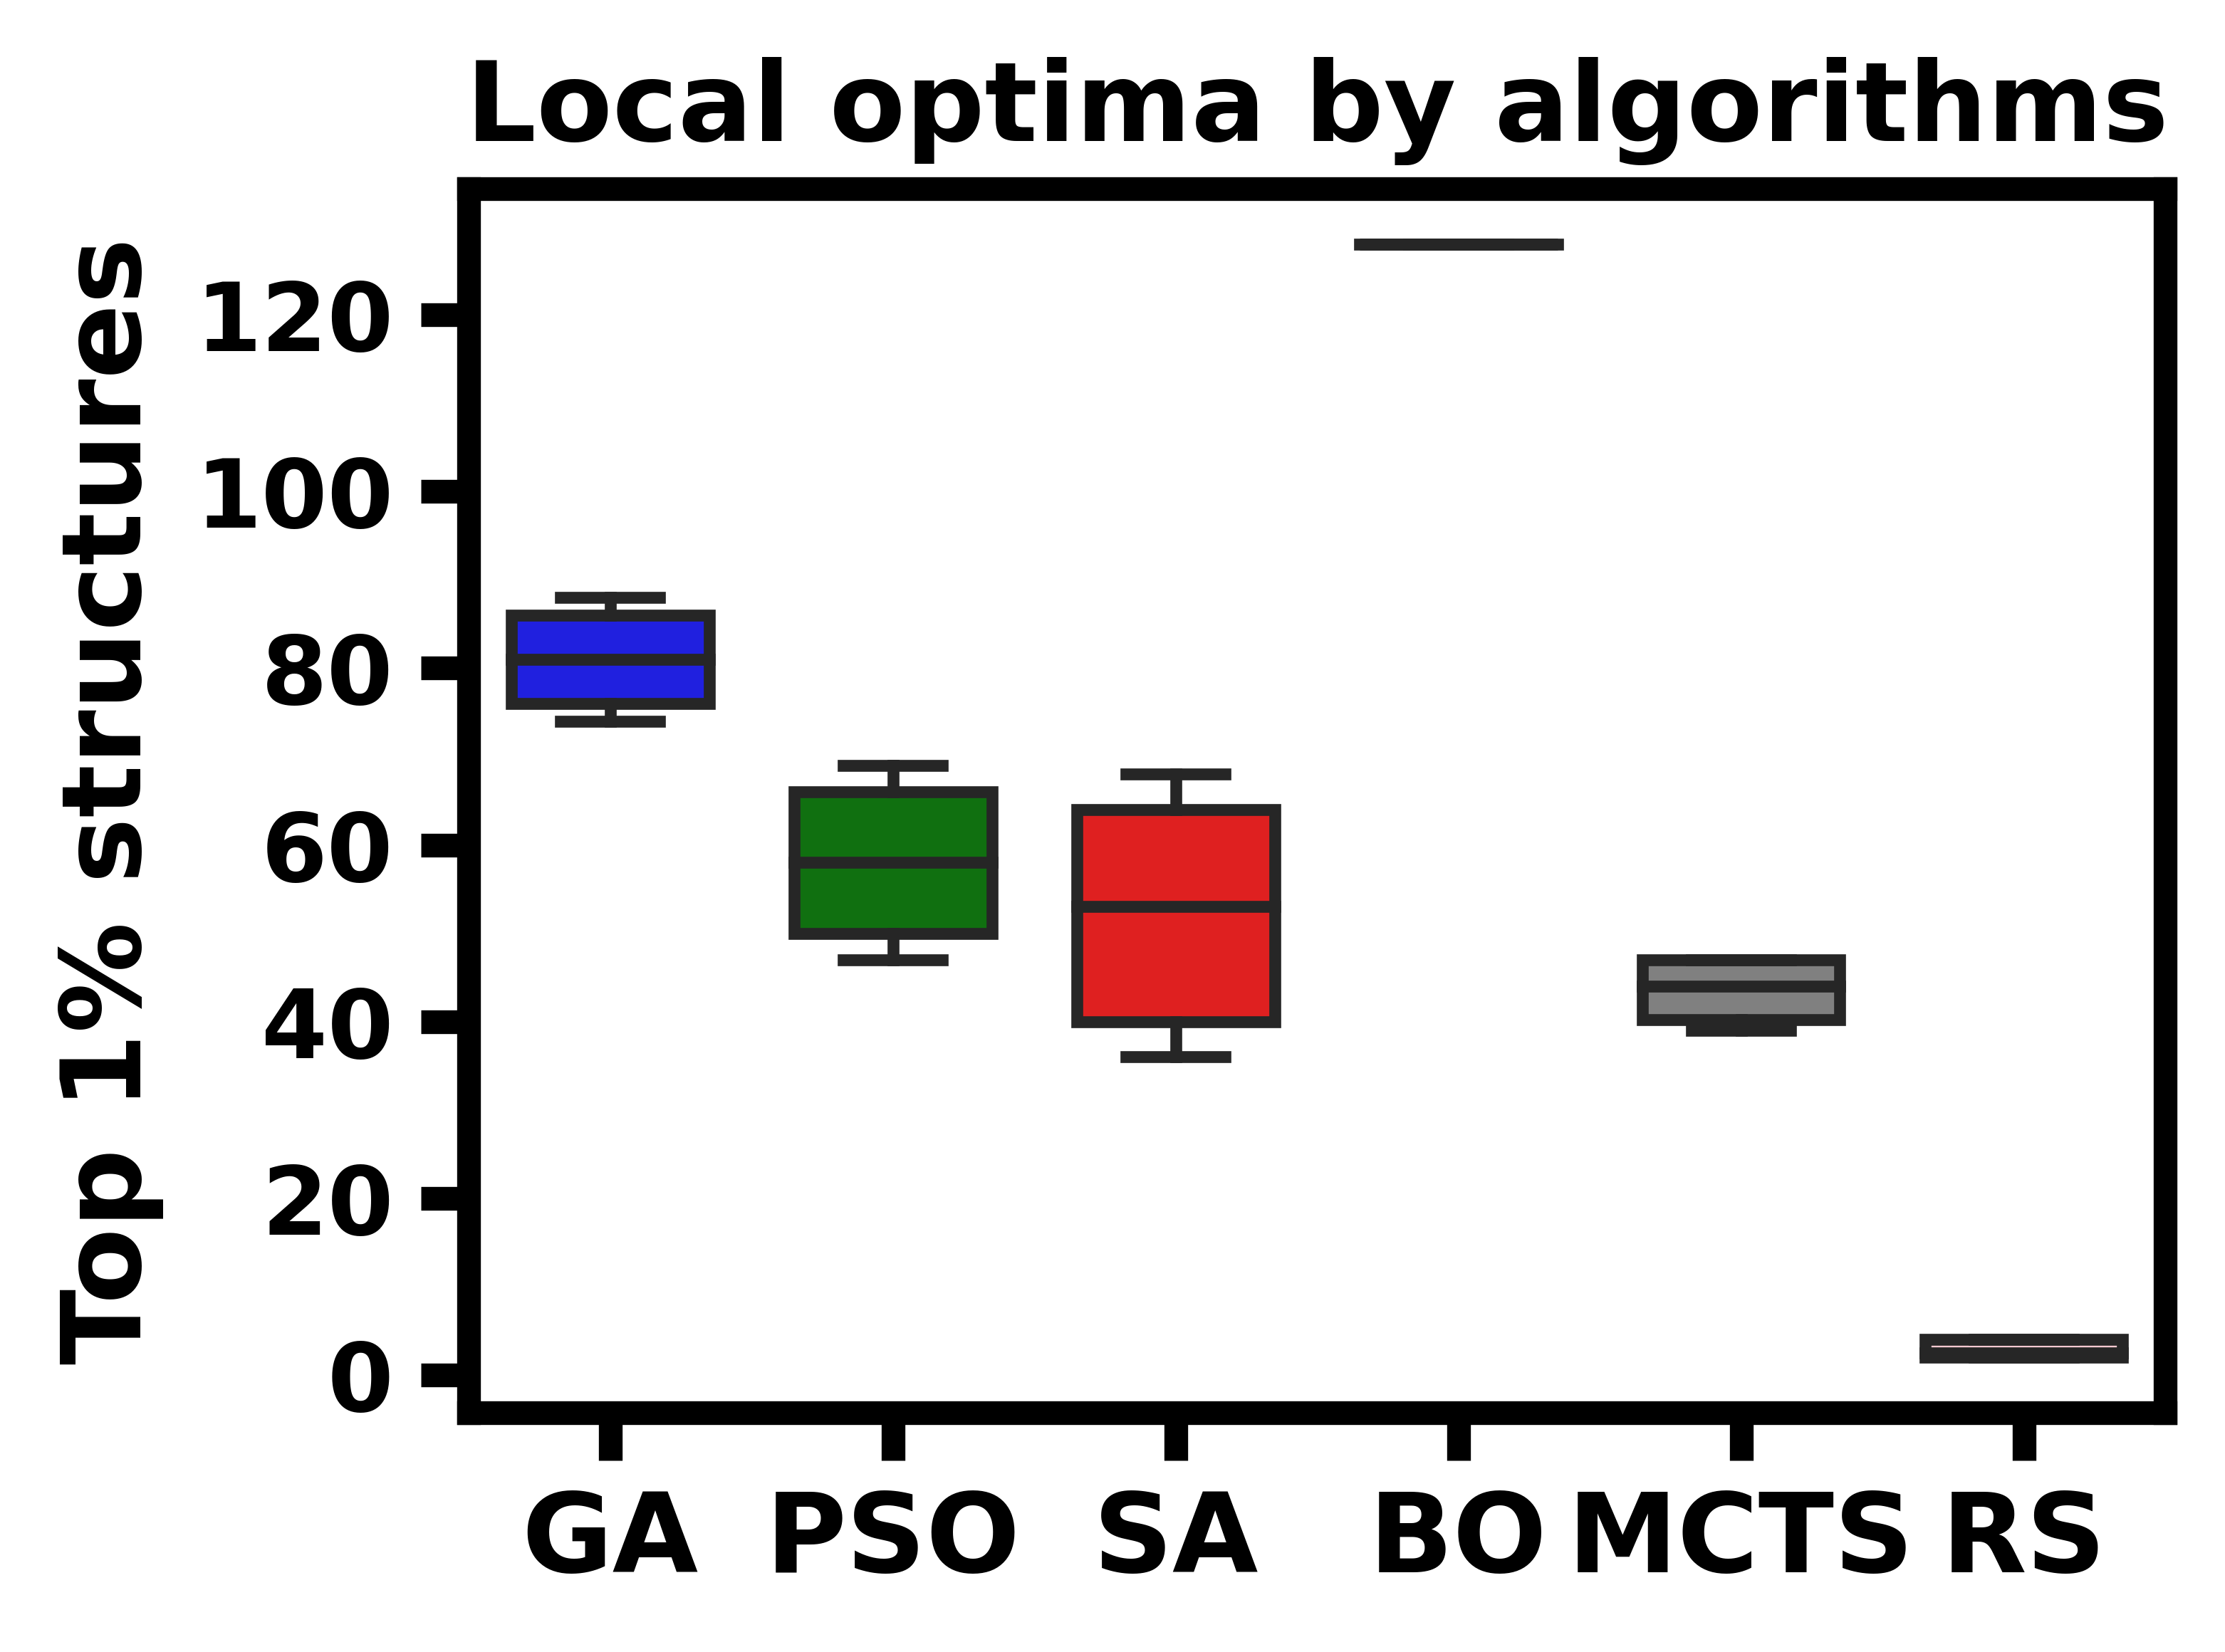

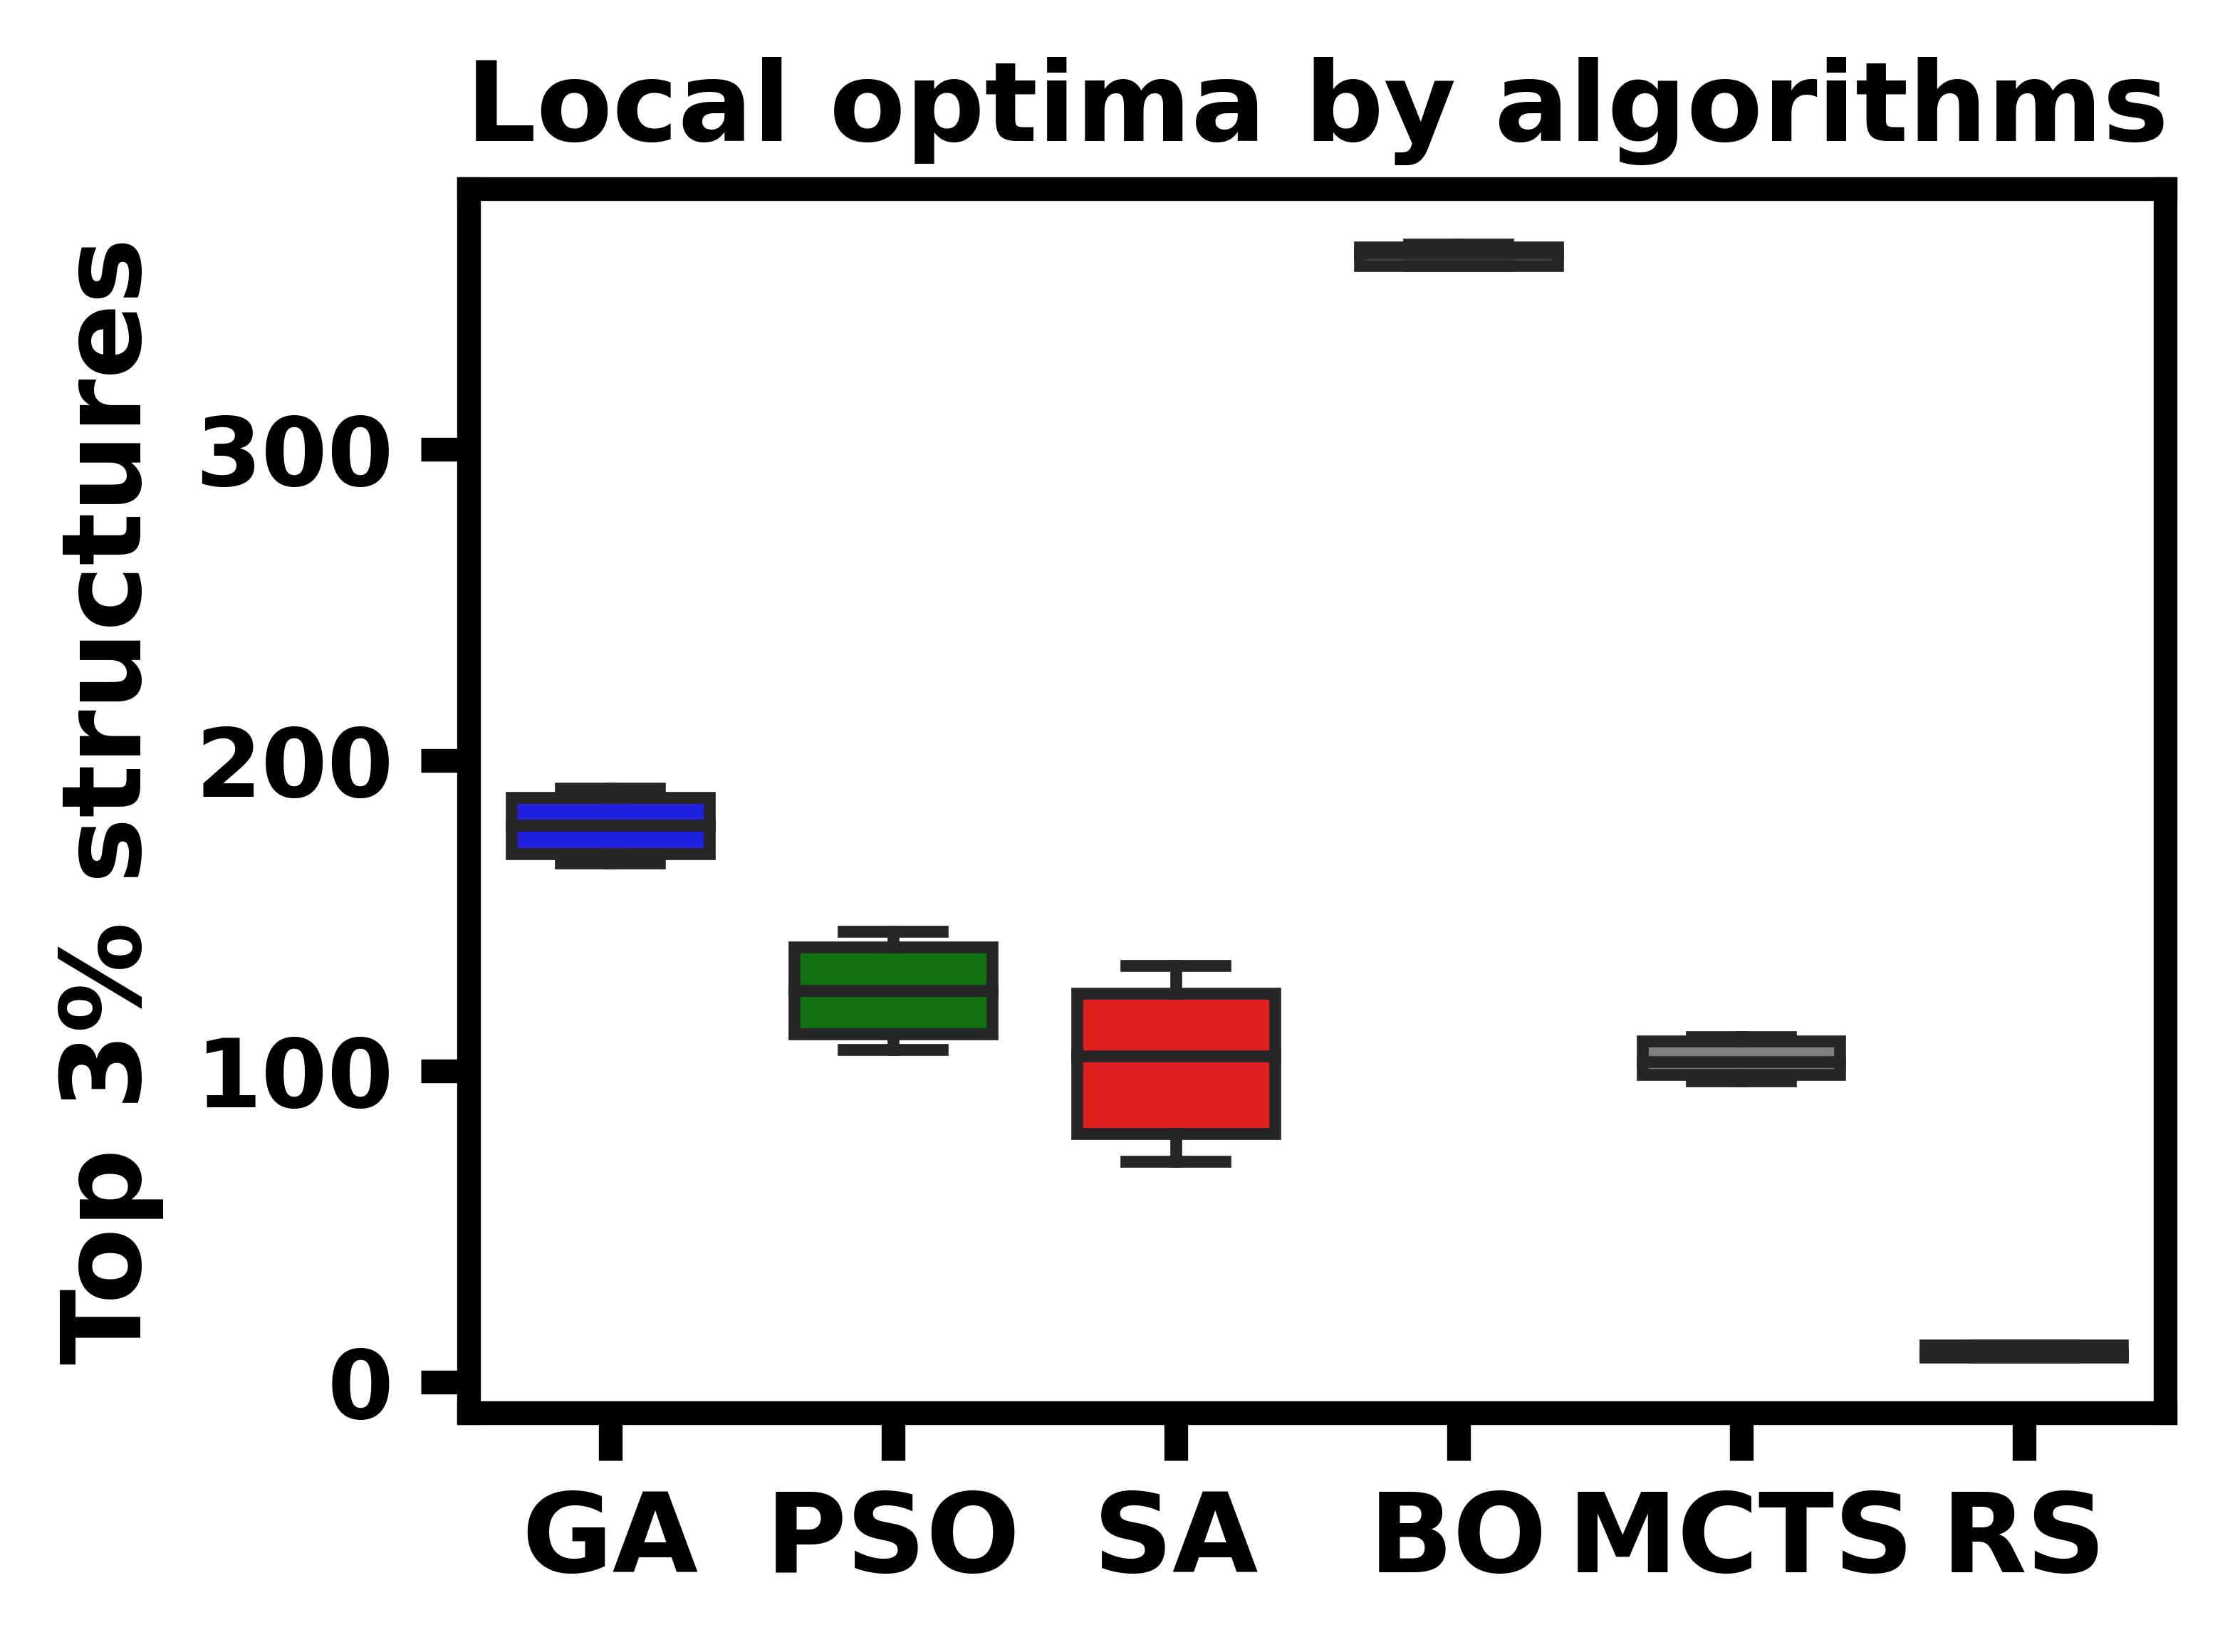

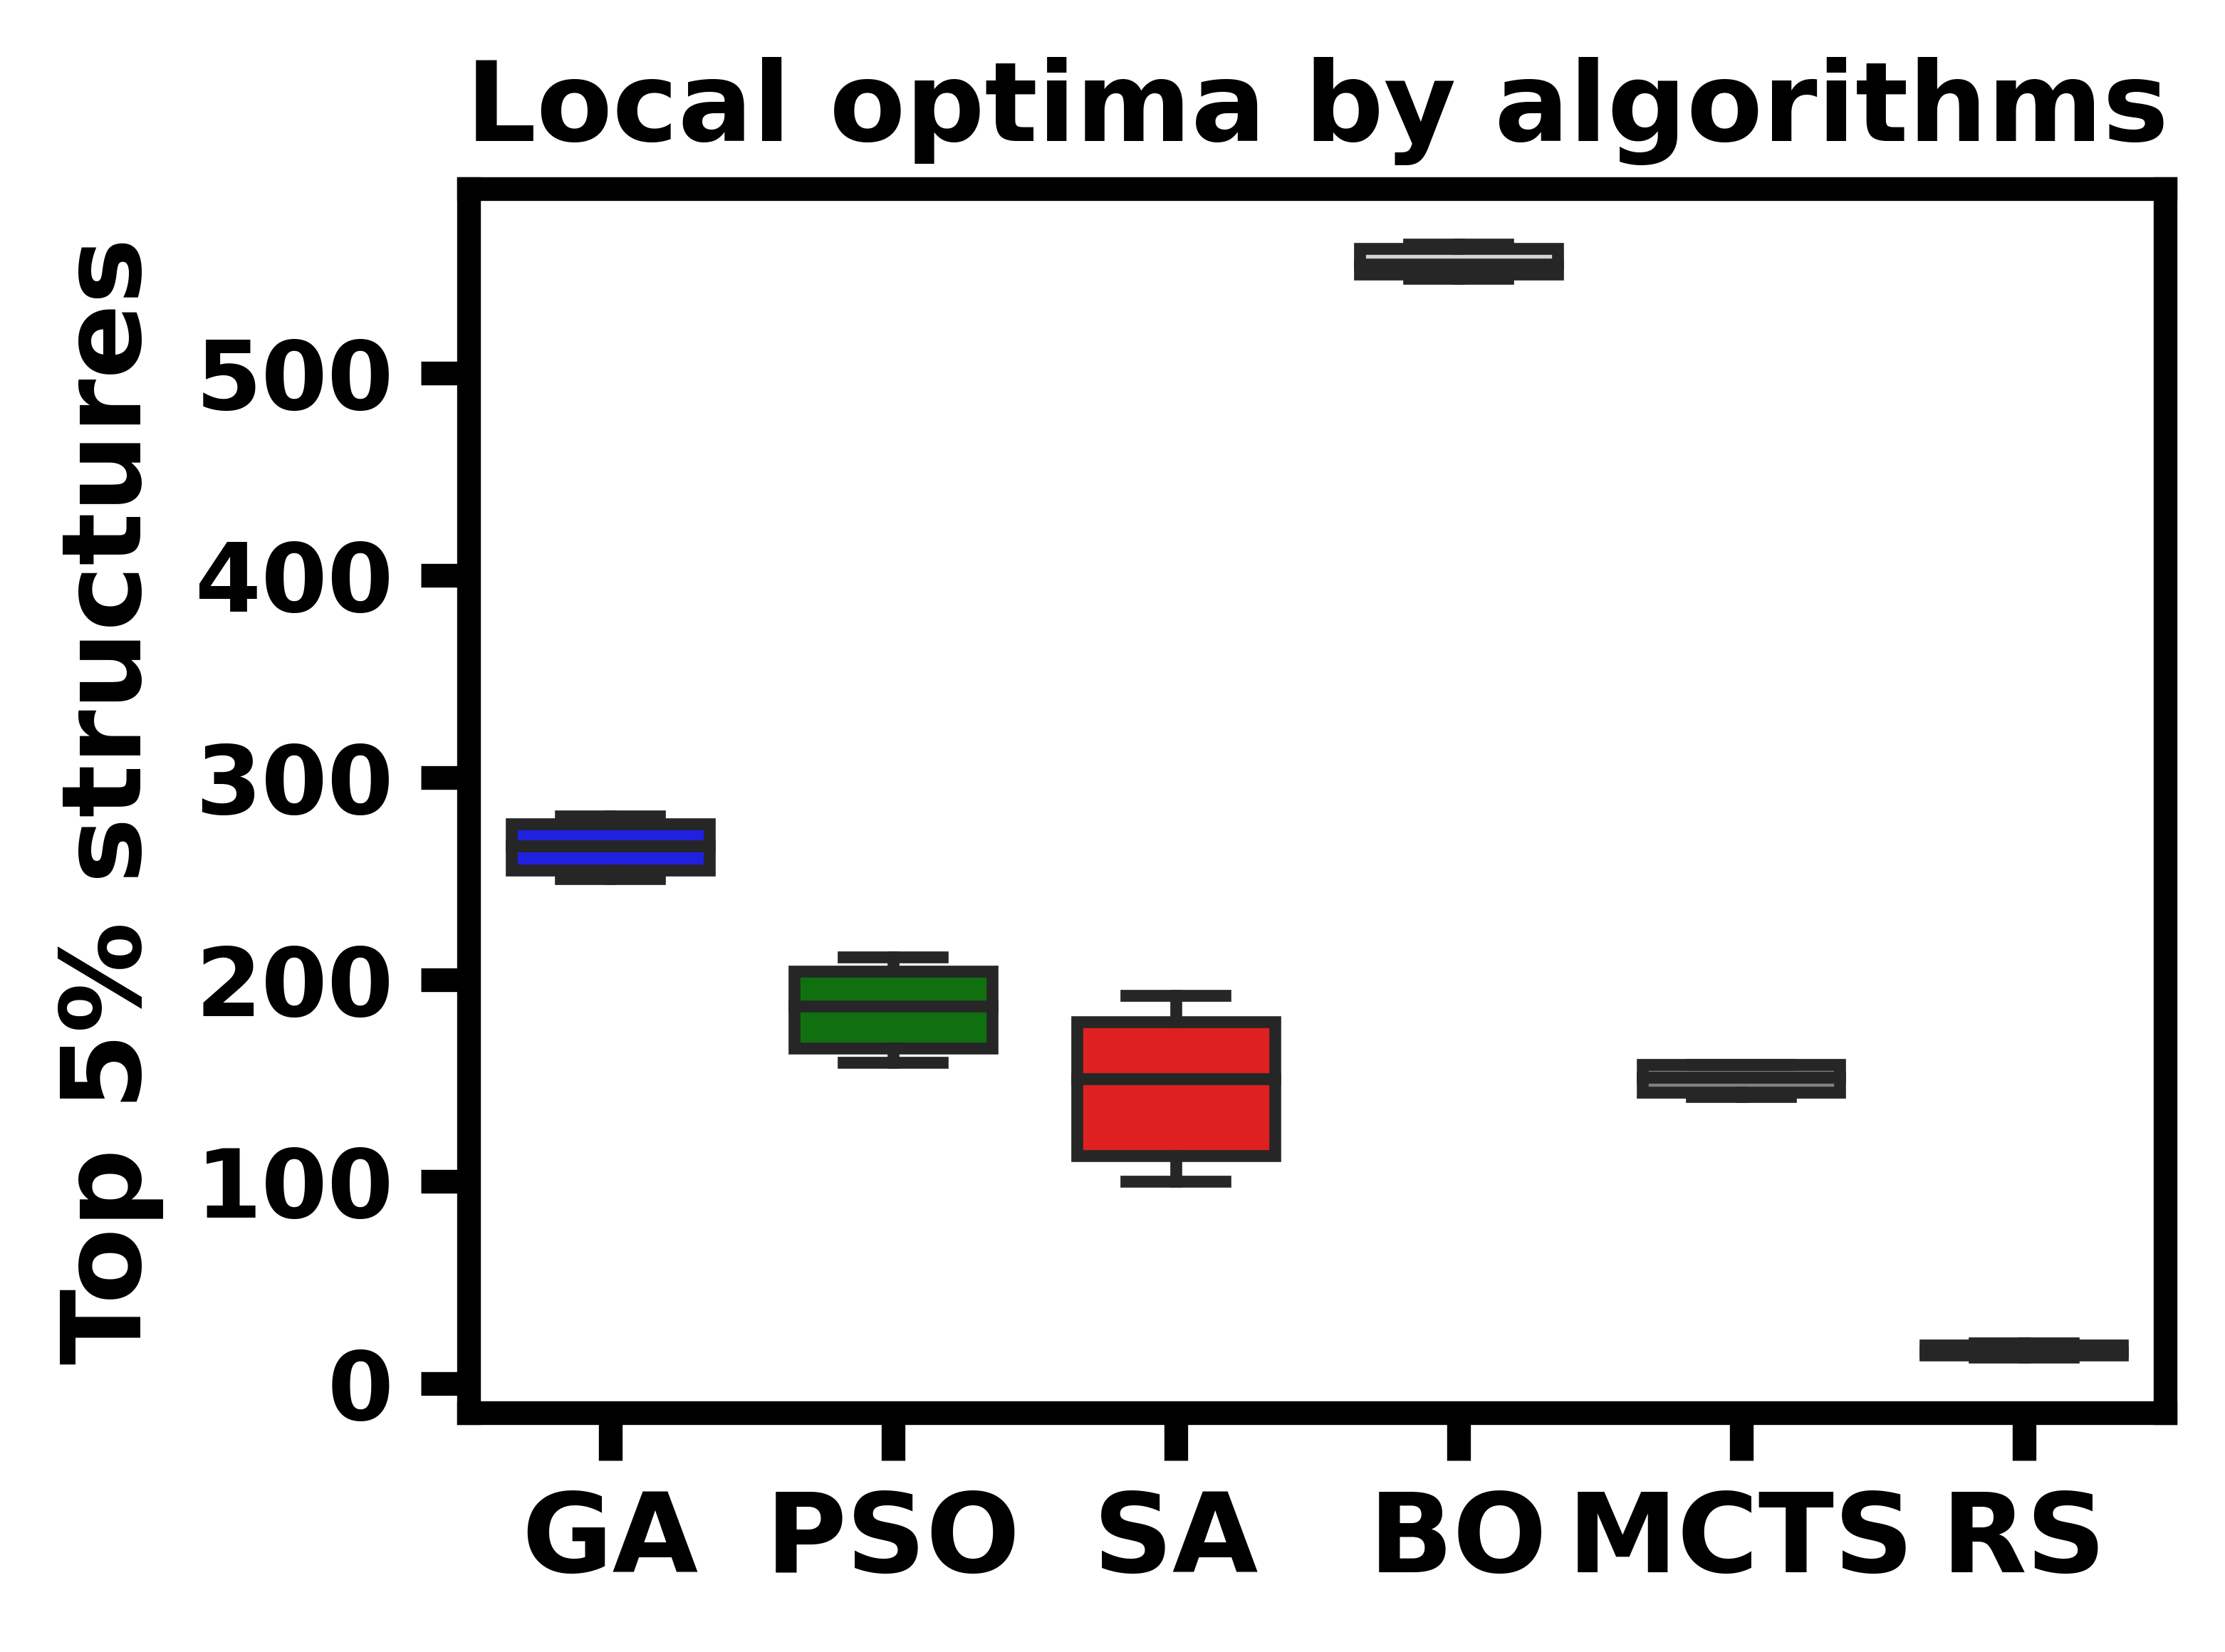

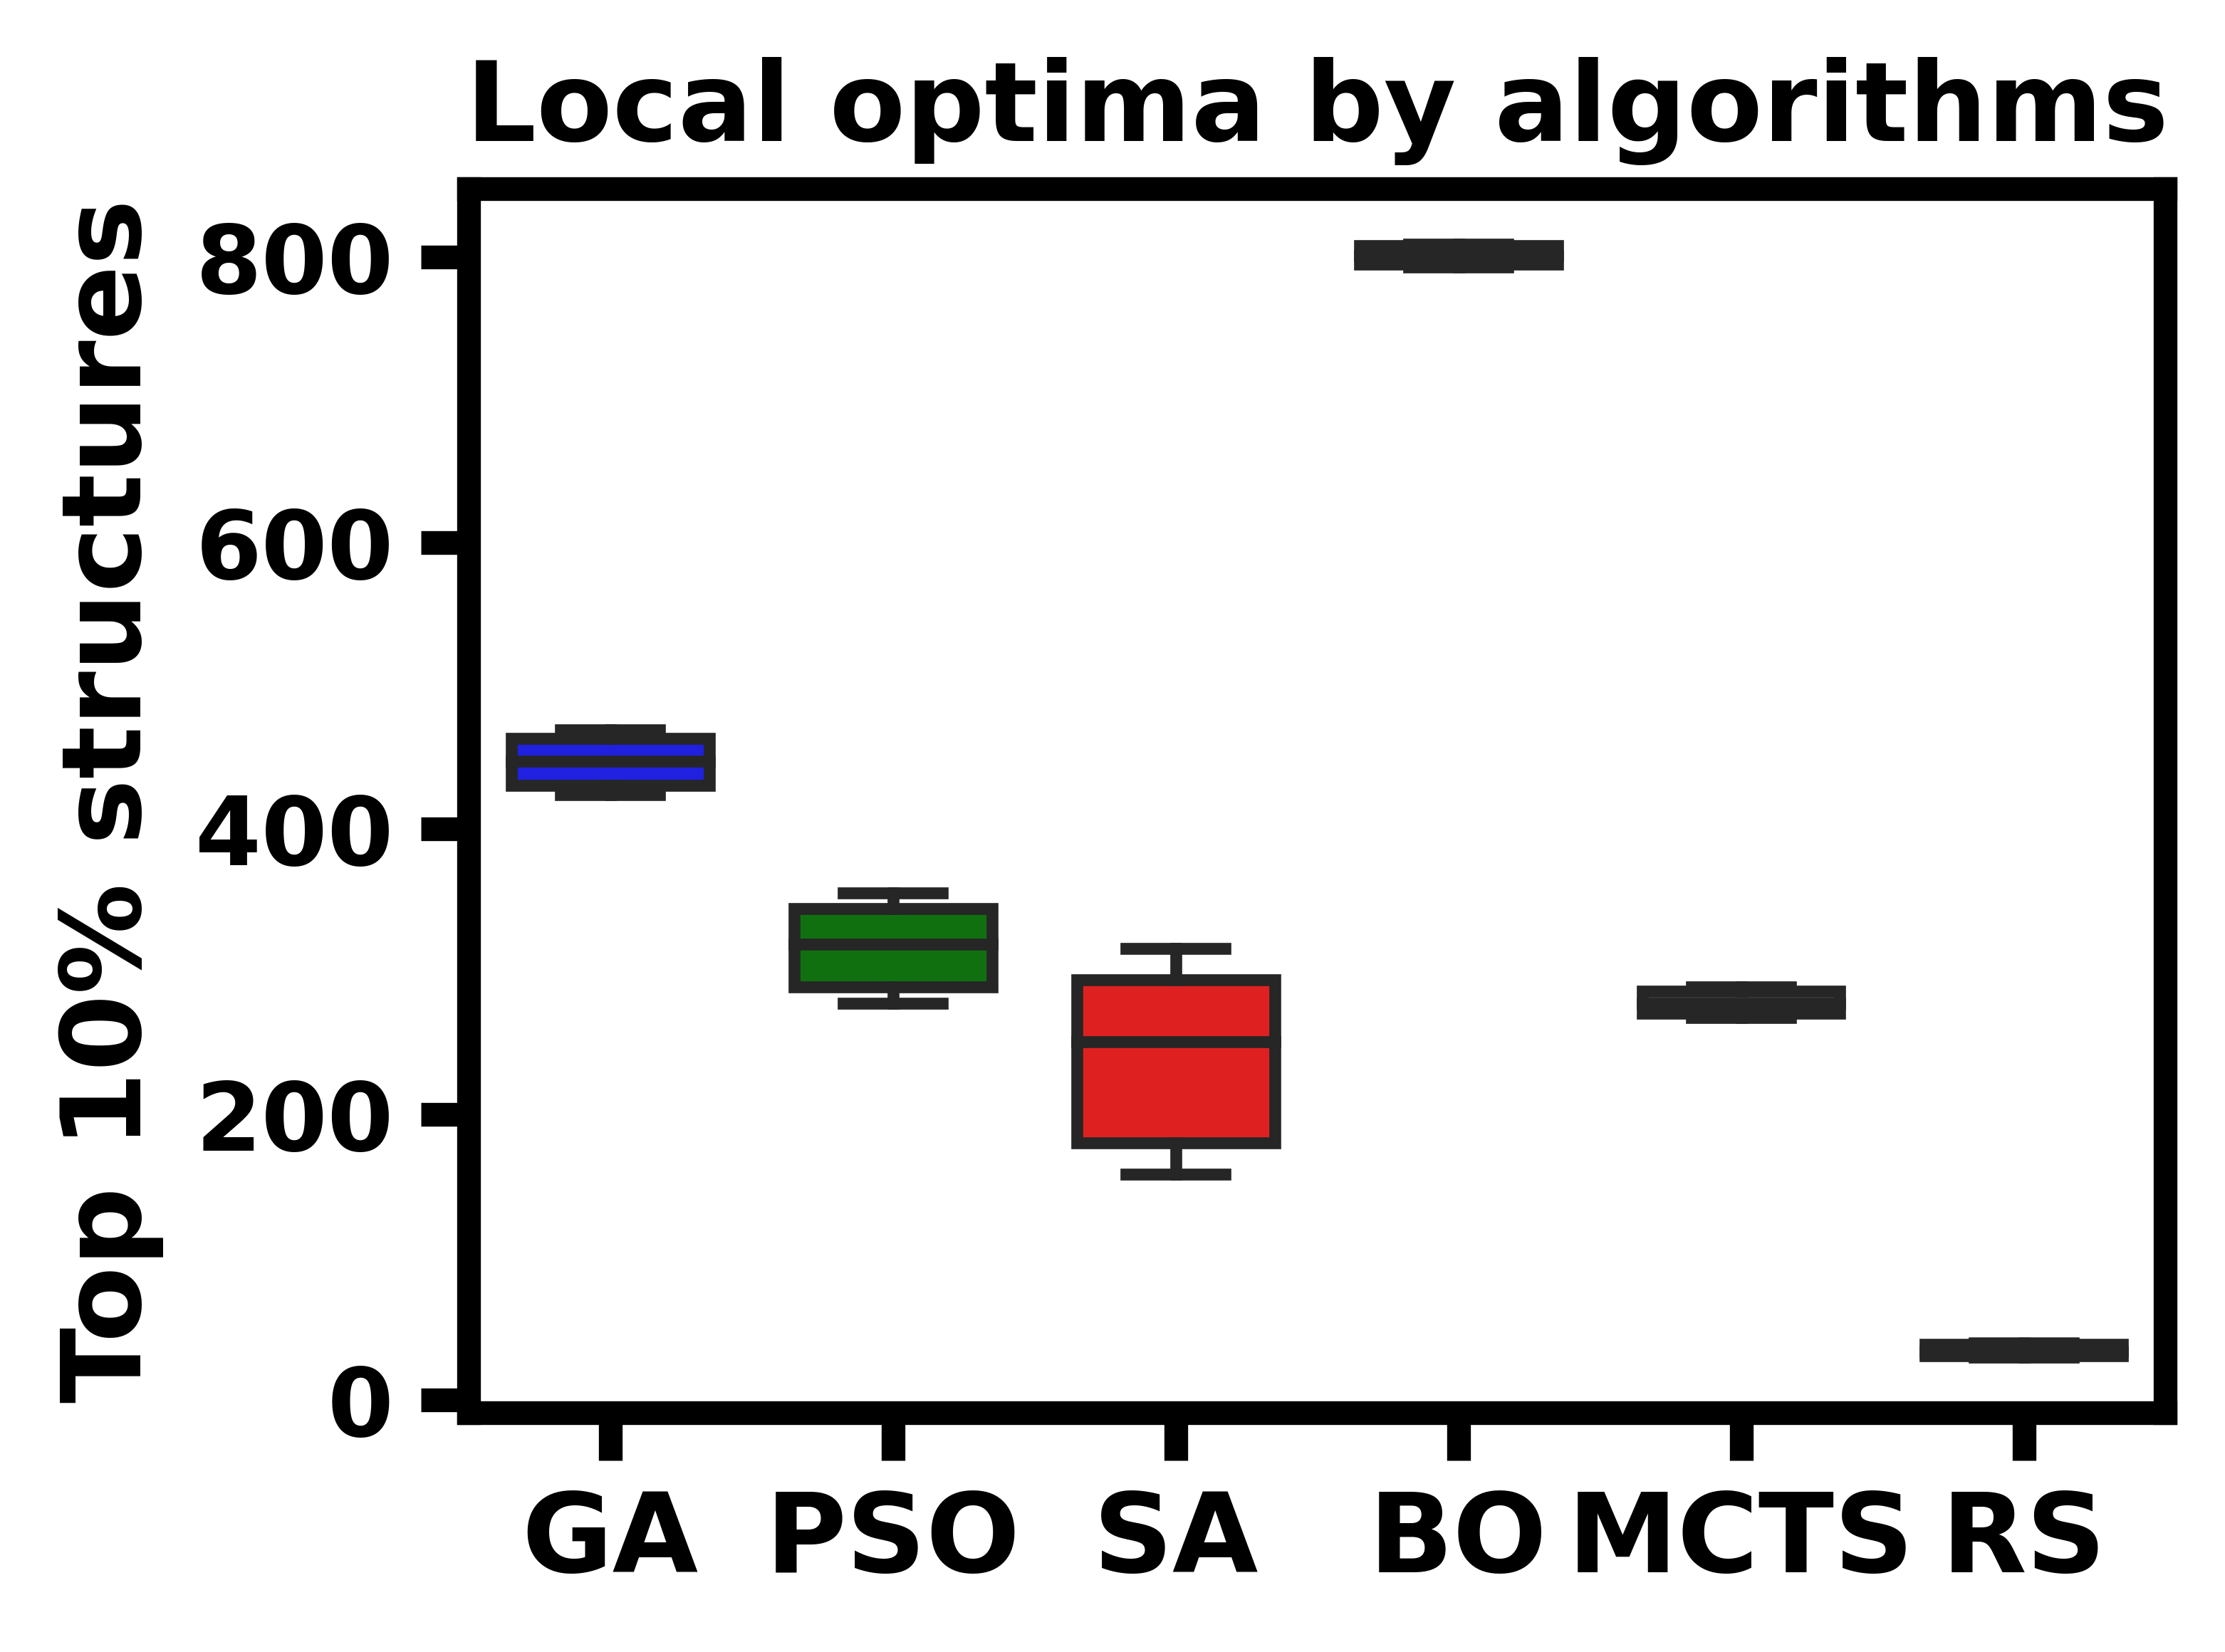

In [2]:
for pindex, P in enumerate(P_list):
    
    GA_file_path = os.path.join(GA_dir, P)
    PSO_file_path = os.path.join(PSO_dir, P)
    SA_file_path = os.path.join(SA_dir, P)
    BO_file_path = os.path.join(BO_dir, P)
    MDTS_file_path = os.path.join(MDTS_dir, P)
    RO_file_path = os.path.join(RO_dir, P)

    GAdata = np.loadtxt(GA_file_path, dtype=int)
    PSOdata = np.loadtxt(PSO_file_path, dtype=int)
    SAdata = np.loadtxt(SA_file_path, dtype=int)
    BOdata = np.loadtxt(BO_file_path, dtype=int)
    MDTSdata = np.loadtxt(MDTS_file_path, dtype=int)
    ROdata = np.loadtxt(RO_file_path, dtype=int)

    data = [GAdata, PSOdata, SAdata, BOdata, MDTSdata, ROdata]
    labels = ['GA', 'PSO', 'SA', 'BO', 'MCTS', 'RS']

    plt.figure(figsize=(4, 3), dpi=800)
    sns.boxplot(
        data=data,
        width = 0.7,
        showfliers = False,
        whis = 0.2,
        palette=custom_palette
    )
    
    plt.gca().spines['top'].set_linewidth(3)
    plt.gca().spines['right'].set_linewidth(3)
    plt.gca().spines['bottom'].set_linewidth(3)
    plt.gca().spines['left'].set_linewidth(3)
    plt.tick_params(axis='both', which='major', width=3, length=6)
    plt.xticks(range(len(data)), labels, fontsize=14,fontweight='bold')
    plt.yticks(fontsize=12,fontweight='bold')
    plt.ylabel(title_list[pindex],fontsize=14,fontweight='bold')
    plt.title('Local optima by algorithms',fontsize=14,fontweight='bold')
    plt.tight_layout()
    plt.savefig(P.split('.log')[0]+'.png')
    plt.show()